In [133]:
#import the necessities
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

In [58]:
#get the data
##the sample notebook uses the .tst file, but I think the .trn file
##was the one meant as the training file
df_train_data = pd.read_csv('D:/DSF/shuttle.trn', header=None, sep=' ')
df_test_data = pd.read_csv('D:/DSF/shuttle.tst', header=None, sep=' ')

In [28]:
#for these, I prefer to have a copy of the df readily available
#to allow for an easy reset
df_copy = df_train_data.copy()
df_copy.head()

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


In [93]:
#setting a binary set in column 9
##the sample book shows the code as follows:
##df_train_data.loc[df_train_data[9] != 4, 9] = 0
##however, there are no 9s in the 9 column, so
##I am unsure what the point of that is
df_train_data.loc[df_train_data[9] != 4, 9] = 0
df_train_data.loc[df_train_data[9] == 4, 9] = 1

In [94]:
#making two new dfs, one with the binary values
#and one with the rest of the values
X = df_train_data.drop([9], axis=1)
y = df_train_data[9]

In [95]:
#creating a test and train sample from the training
#set to work with. it doesn't state that we should
#use a random state, so one won't be used here
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [96]:
#run the logistic regression. it doesn't state a penalty
#to use or a number of iterations to run, so we'll
#leave those blank for now
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [97]:
#fit the data
lr.fit(X_train, y_train)
#print the score
lr.score(X_test, y_test)

0.8185747126436782

In [98]:
#make a dummy classifier, run it, and compare
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)
###the classifier has a ~-3% difference relative to
###the dummy, so our predictor needs some work

0.8471724137931035

In [107]:
#print a confusion matrix
predictions = lr.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[1,0])
print(confusion)
###looks like we have a lot of false negatives

[[ 115 1547]
 [ 426 8787]]


In [110]:
#run metric tests
#f1, fbeta, precision, recall, accuracy
f1 = f1_score(y_test, predictions)
print("F1 score: {:.2f}".format(f1))
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
print("Fbeta favoring precision score: {:.2f}".format(fbeta_precision))
fbeta_recall = fbeta_score(y_test, predictions, 2.0)
print("Fbeta favoring recall score: {:.2f}".format(fbeta_recall))
precision = precision_score(y_test, predictions)
print("Precision score: {:.2f}".format(precision))
recall = recall_score(y_test, predictions)
print("Recall score: {:.2f}".format(recall))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score: {:.2f}".format(accuracy))

F1 score: 0.10
Fbeta favoring precision score: 0.15
Fbeta favoring recall score: 0.08
Precision score: 0.21
Recall score: 0.07
Accuracy score: 0.82


In [109]:
#run a classification report
report = classification_report(y_test, predictions, target_names=['Not 4', '4'])
print(report)

              precision    recall  f1-score   support

       Not 4       0.85      0.95      0.90      9213
           4       0.21      0.07      0.10      1662

    accuracy                           0.82     10875
   macro avg       0.53      0.51      0.50     10875
weighted avg       0.75      0.82      0.78     10875



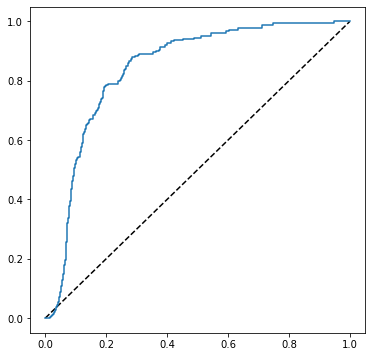

In [116]:
#make a ROC curve
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [121]:
#calculate the auc
auc = roc_auc_score(y_test, probs)
print('{:.3f}'.format(auc))

0.841


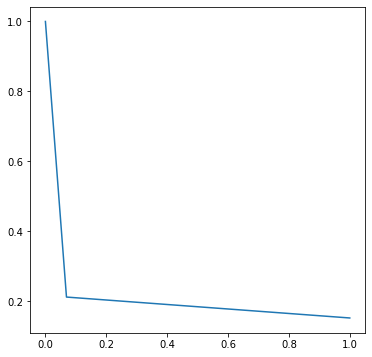

In [118]:
#make a precision-recall curve
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
plt.figure(figsize=(6,6))
plt.plot(rec, pres)
plt.show()

In [124]:
#run cross-validation tests
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(cv_scores)
print(cv_scores.mean())

[0.8148659  0.82130268 0.81425287 0.81624521 0.81885057]
0.8171034482758621


In [129]:
#run a knn with k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('{:.3f}'.format(knn.score(X_test, y_test)))
###it is significantly more accurate, meaning
###the data is likely non-linear

0.999


In [138]:
#run a random forest test
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)
print('{:.3f}'.format(rf.score(X_test, y_test)))

1.000
